In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
full_data = pd.read_csv('./data/Kaggle/LeagueofLegends.csv')
game_results = full_data.loc[:,'bResult']
ind_blue_wins = game_results[game_results==1]
ind_red_wins = game_results[game_results==0]

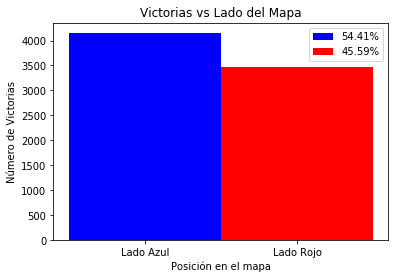

In [43]:
##PARTIDAS GANADAS POR EL LADO AZUL Y PARTIDAS GANADAS POR LE LADO ROJO
wins = ind_blue_wins.size
lose = ind_red_wins.size
percent_wins = "{0:.2f}".format((wins / (wins + lose)) * 100)
percent_lose = "{0:.2f}".format((lose / (wins + lose)) * 100)
plt.xlabel('Posición en el mapa')
plt.ylabel('Número de Victorias')
plt.title('Victorias vs Lado del Mapa')
plt.bar(0,wins,color = "b", width = 1 , label = percent_wins+"%")
plt.bar(1,lose,color = "r", width = 1 , label = percent_lose+"%")
plt.legend()
plt.xticks([0,1],["Lado Azul","Lado Rojo"])
plt.show()

In [44]:
import ast #Este import me permitirá convertir String en List
kills = full_data.loc[:,('bKills','rKills')]
blue_kills = []
red_kills = []
for i in range(0,len(kills)):
    x = kills['bKills'][i]
    y = kills['rKills'][i]
    blue_kills.append(ast.literal_eval(x))
    red_kills.append(ast.literal_eval(y))

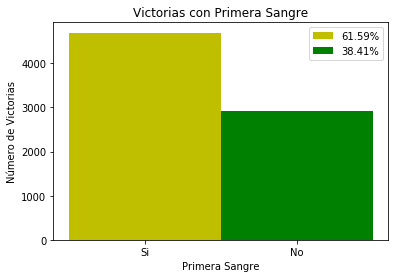

In [46]:
##PARTIDAS GANADAS POR OBTENER LA PRIMER SANGRE
first_blood = []
for i in range(0,len(kills)):
    if len(blue_kills[i]) == 0:
        first_blood.append(0)
    else:
        if len(red_kills[i]) == 0:
            first_blood.append(1)
        else:
            first_blood.append(0 if (blue_kills[i][0][0]>red_kills[i][0][0]) else 1)

fblood_wins = len(game_results[game_results==first_blood[:]])
nfblood_wins = len(game_results[game_results!=first_blood[:]])

percent_fblood_wins = "{0:.2f}".format((fblood_wins / (fblood_wins + nfblood_wins)) * 100)
percent_nfblood_wins = "{0:.2f}".format((nfblood_wins / (fblood_wins + nfblood_wins)) * 100)

plt.xlabel('Primera Sangre')
plt.ylabel('Número de Victorias')
plt.title('Victorias con Primera Sangre')
plt.bar(0,fblood_wins,color = "y", width = 1, label = percent_fblood_wins+"%")
plt.bar(1,nfblood_wins,color = "g", width = 1, label = percent_nfblood_wins+"%")
plt.legend()
plt.xticks([0,1],["Si","No"])
plt.show()

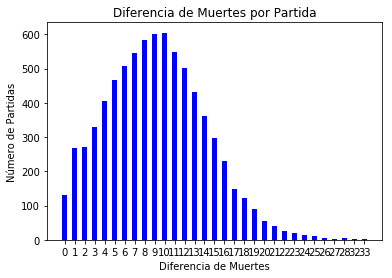

In [27]:
#VICTORIA POR DIFERENCIA DE MUERTES
diff_kill = []
for i in range(0,len(kills)):
    diff_kill.append(np.absolute(len(blue_kills[i])-len(red_kills[i])))
unique_elements, counts_elements = np.unique(diff_kill, return_counts=True)
diff_kill = np.asarray((unique_elements,counts_elements))

plt.xlabel('Diferencia de Muertes')
plt.ylabel('Número de Partidas')
plt.title('Diferencia de Muertes por Partida')
n = np.arange(len(diff_kill[0]))
for i in n:
    plt.bar(i,diff_kill[1][i],color = "b", width = 0.5)
plt.xticks(n,diff_kill[0])
plt.show()

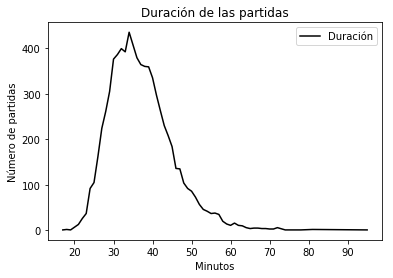

array([[ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  74,  75,  77,  78,  81,  95],
       [  1,   2,   1,   7,  13,  26,  37,  92, 105, 162, 224, 261, 305,
        376, 386, 399, 392, 435, 407, 379, 364, 360, 359, 335, 297, 263,
        230, 208, 184, 136, 135, 104,  92,  86,  73,  57,  46,  42,  37,
         38,  35,  20,  14,  11,  16,  11,  10,   6,   4,   5,   5,   4,
          4,   3,   3,   6,   1,   1,   1,   1,   2,   1]])

In [205]:
#VICTORIA POR DURACIÓN DE PARTIDAS
game_length = full_data.loc[:,('gamelength')]
unique_elements, counts_elements = np.unique(game_length, return_counts=True)
time = np.asarray((unique_elements,counts_elements))

plt.plot(time[0],time[1], color = 'black', label = 'Duración')
plt.legend()
plt.title('Duración de las partidas')
plt.xlabel('Minutos')
plt.ylabel('Número de partidas')
plt.show()
time

In [178]:
#Se OBTIENE LA LISTA DE LA DIFERENCIA DE ORO POR MINUTO
gold_diff = full_data.loc[:,('golddiff')]
min_minute = np.min(game_length)
max_minute = np.max(game_length)
total_gold_diff = []
for i in range(0,len(gold_diff)):
    total_gold_diff.append(ast.literal_eval(gold_diff[i]))

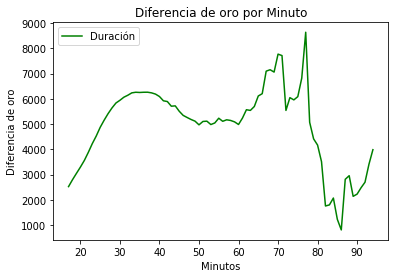

In [204]:
#DIFERENCIA DE ORO POR MINUTO
x_gold = np.zeros(max_minute-min_minute)
count = np.zeros(max_minute-min_minute)
m = np.arange(min_minute,max_minute)
for i in range(0,len(total_gold_diff)):
    k = 0
    n = len(total_gold_diff[i])
    for j in (m):
        if (j < n):
            x_gold[k] +=  np.absolute(total_gold_diff[i][j])
            count[k] += 1
            k += 1
x_gold = np.divide(x_gold,count)

plt.plot(m,x_gold, color = 'g', label = 'Duración')
plt.legend()
plt.title('Diferencia de oro por Minuto')
plt.xlabel('Minutos')
plt.ylabel('Diferencia de oro')
plt.show()

In [210]:
a = []
for i in range(0,len(total_gold_diff)):
    k = 0
    b = []
    n = len(total_gold_diff[i])
    for j in (m):
        if (j < n):
            b.append(x_gold[k] >= np.absolute(total_gold_diff[i][j]) )
            k += 1
    a.append(b)

In [211]:
a

[[True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False],
 [True, False, False, False, False, False, False],
 [True,
  True,
  True,
  False,
  False,
  Fa